In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [46]:

import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
bottle_df = pd.read_csv("../input/calcofi/bottle.csv")


In [ ]:
bottle_df.head()

In [ ]:
bottle_df.columns

Rename columns

In [ ]:
columns = ["Cast Count", "Bottle Count", "Station ID", "Depth ID", "Depth", "Temperature", "Salinity",
           "O2_mL/L", "H2O Density", "O2 Sat", "O2_µmol/Kg", "Bottle No", "Record Indicator",
           "Temperature Precision", "Temperature Quality", "Salinity Precision", "Salinity Quality",
           "Pressure Quality", "O2 Quality", "H20_Density Quality", "O2_Saturation Quality",
           "Chlorophyll-a", "Chlorophyll-a Quality", "Phaeophytin_Concentration", "Phaeophytin Quality", "Phosphate Concentration",
           "Phosphate Quality", "Silicate Concentration", "Silicate Quality", "Nitrite Concentration",
           "Nitrite Quality", "Nitrate Concentration", "Nitrate Quality", "NH4 Concentration", "NH4 Quality",
           "C14_As1", "C14_As1 Precision", "C14_As1 Quality", "C14_As2", "C14_As2 Precision", "C14_As2 Quality",
           "C14_As_Dark", "C14_As_Dark Precision", "C14_As_Dark Quality", "Mean_C14_As", "Mean_C14_As Precision",
           "Mean_C14_As Quality", "Incubation Time", "Light Intensity", "Reported Depth", "Reported Temperature",
           "Reported Potential Temperature", "Reported Salinity", "Reported Potential Density",
           "Reported Specific Volume Anomaly", "Reported Dynamic Height", "Reported O2_mL/L", "Reported O2 Sat",
           "Reported Silicate Concentration", "Reported Phosphate Concentration", "Reported Nitrate Concentration",
           "Reported Nitrite Concentration", "Reported NH4 Concentration", "Reported Chlorophyll-a",
           "Reported Phaeophytin", "Pressure (decibars)", "Sample No", "Dissolved_Inorganic_Carbon1",
           "Dissolved_Inorganic_Carbon2", "Total Alkalinity1", "Total Alkalinity2", "pH2", "pH1",
           "DIC Quality Comment"
          ]

bottle_df.columns = columns



EDA

In [ ]:
def data_exploration(df):
    print(f'The shape of the dataframe is {df.shape}')
    print()
    print('Description of the dataset')
    print(df.describe(include='all'))
    print()
    print('Information on the data ')
    print(df.info())
    print()
    print('Check for duplicate')
    print(df.duplicated().sum())
    

In [ ]:
data_exploration(bottle_df)

Incubation time has a data type of object, we may consider changing it to a data time dtype and extracting some feature from it.

I later discovered that this feature had 98% missing values, so i'll be dropping it

In [ ]:
bottle_df['Incubation Time']

In [ ]:
def missing_values(df):
    missing = pd.DataFrame({'Number of missing values': (df.isnull().sum()).sort_values(ascending=False),
                           'Percentage of missing values': (df.isnull().sum()/len(df) * 100).sort_values(ascending=False)
                           })
    return missing

In [ ]:
missing  = missing_values(bottle_df).head(50)

In [ ]:
missing

In [ ]:
data = bottle_df.copy()

In [ ]:
drop_threshold = 70

In [ ]:
# get the columns that fall above the drop_threshold 
columns_to_drop = missing[missing["Percentage of missing values"] > drop_threshold].index

# drop the columns
data.drop(columns_to_drop, axis=1, inplace=True)

# since salinity is the target feature, it should no have missing values
data.dropna(subset=["Salinity"], inplace=True)

# As earlier stated, exclude the first four columns from the following steps
new_data = data.iloc[:, 4:]

In [ ]:
new_data

In [ ]:
"""split the dataset into continuous and categorical columns""" 
# create an empty dictionary to hold the number of unique values per column
uniques = {}

# iterate through the data columns and append the number of unique values in each column to the
# unique dictionary
for column in new_data.columns:
    uniques[column] = new_data[column].nunique()
    


In [ ]:
 # from careful examination, a threshold of 6 unique values seems to be appropriate for the split
    
# get the categorical and continuous columns based on the threshold 
cat_attributes = [column for column in uniques if uniques[column] <= 6]
num_attributes = [column for column in uniques if uniques[column] > 6]

# Create a new dataframe with the created attributes in a specific order
new_data1 = pd.concat([new_data[num_attributes], new_data[cat_attributes]], axis=1)

Exploring categorical features

In [ ]:
new_data[cat_attributes].nunique()

In [ ]:
#cat_ = new_data[cat_attributes]

In [55]:
for col in cat_attributes:
    print(new_data[col].value_counts())
    print('=' *50)
    print()
    

3    431806
7    302040
5     80611
6      3050
4         2
Name: Record Indicator, dtype: int64

2.0    796172
3.0     15976
1.0      2099
Name: Temperature Precision, dtype: int64

3.0    585980
2.0    231529
Name: Salinity Precision, dtype: int64

9.0    626775
6.0         1
Name: Pressure Quality, dtype: int64

9.0    595148
8.0        97
Name: Chlorophyll-a Quality, dtype: int64

9.0    595148
8.0       100
Name: Phaeophytin Quality, dtype: int64

9.0    423516
8.0       252
4.0         1
Name: Phosphate Quality, dtype: int64

9.0    468754
8.0       139
4.0         1
Name: Silicate Quality, dtype: int64

9.0    484281
8.0      2208
4.0        39
Name: Nitrite Quality, dtype: int64

9.0    485214
8.0      2228
4.0       277
6.0         1
Name: Nitrate Quality, dtype: int64

9.0    752488
4.0      8460
Name: NH4 Quality, dtype: int64

9.0    802750
8.0         7
Name: C14_As1 Quality, dtype: int64

9.0    802750
8.0         7
Name: C14_As2 Quality, dtype: int64

9.0    795638
8.0  

From the above cell we see that some of the categorical columns have just one dominant class. 

In [ ]:
#fig, ax = plt.subplots(2,2)
#fig = plt.figure()
#ax1 = fig.add_subplot(2,1,1)
#ax2 = fig.add_subplot(2,1,2)

#ax1=  sns.countplot(new_data['Record Indicator'])
#ax2 = sns.countplot(new_data['Temperature Precision'])
#ax1.bar(new_data['Temperature Precision'], height=5)

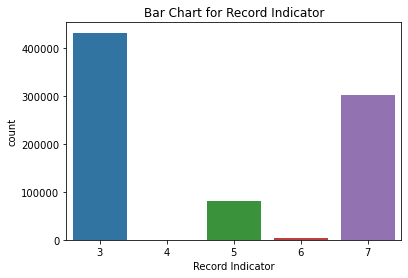

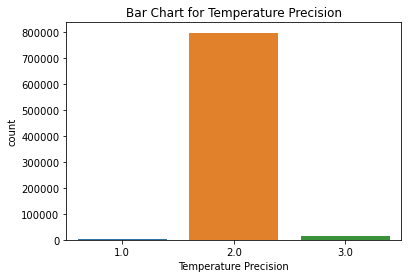

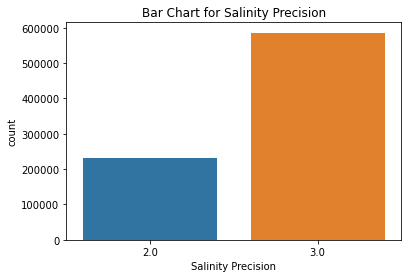

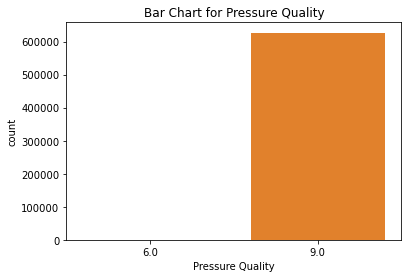

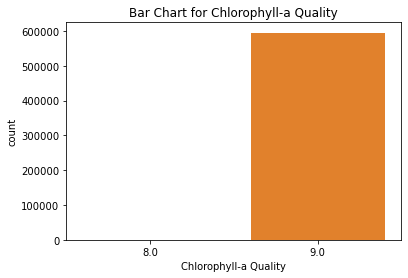

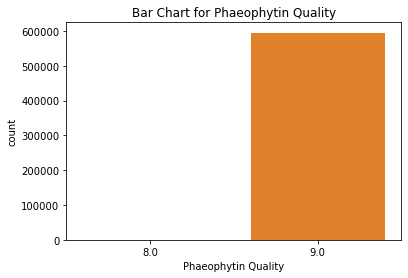

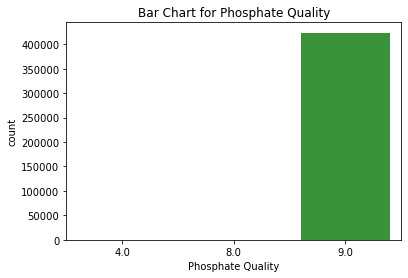

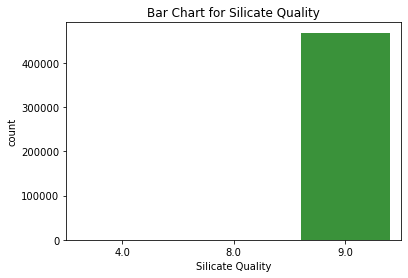

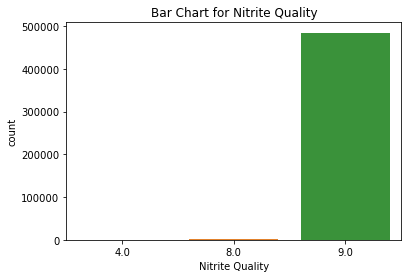

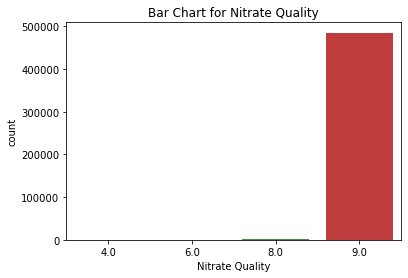

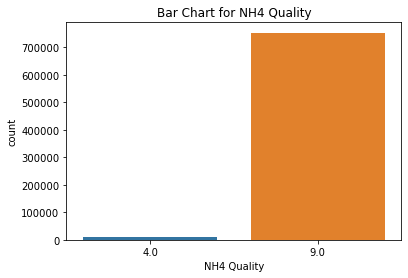

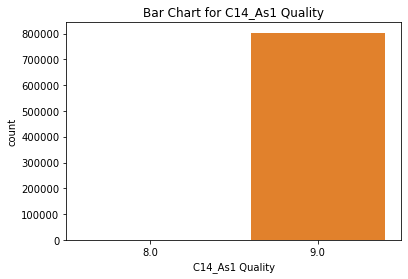

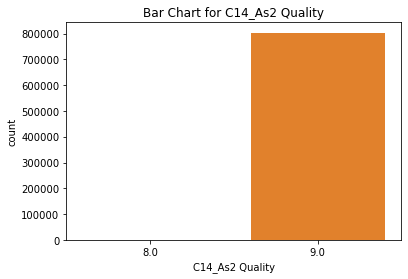

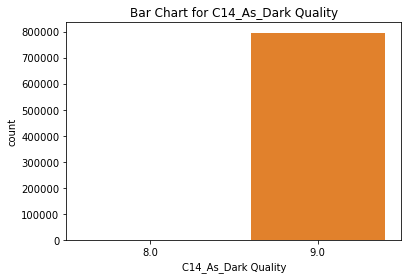

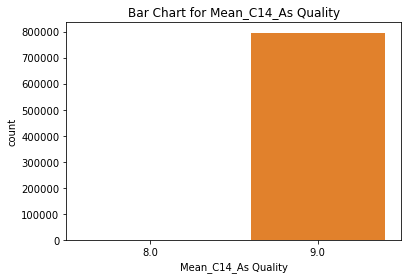

In [54]:
for col in cat_attributes:
    plt.title('Bar Chart for ' + col)
    ax = sns.countplot(new_data[col])
    plt.show()

From the above charts some columns have one dominant class; based on this we may have to drop these columns. 



In [ ]:
cat_drop = cat_attributes[3:] #These are the categorical columns i suggest we  drop

For the record indicator i suggest we categorize it into low, medium and high

In [ ]:
record_indicator = new_data['Record Indicator'].replace({3:'Low', 4:'Medium', 5:'Medium', 6:'Medium', 7:'High'})

In [ ]:
#bar chart after replacing
sns.countplot(record_indicator)

Visualization of numerical columns

In [ ]:
for col in num_attributes:
    plt.title('Distribution for ' + col)
    ax = sns.distplot(new_data[col])
    plt.show()

In [ ]:
#Distribution plot with np.sqrt transformation

for col in num_attributes:
    plt.title('Distribution for ' + col)
    ax = sns.distplot(np.sqrt(new_data[col]))
    plt.show()

In [ ]:
for col in num_attributes:
    plt.title('Boxplot of ' + col)
    ax = sns.boxplot(new_data[col])
    plt.show()

Based on the boxplot we may have to drop some columns, due to their distribution. 

Some suggested columns to drop are Reported Nitrite Concentration, Reported Potential Density, Nitrite Concentration, H2O Density

In [ ]:
data_corr = new_data[num_attributes].corr()

In [ ]:
#Heatmap showing correlation between features
plt.figure(figsize=(15,20))
sns.heatmap(data_corr, annot=True)

From the heatmap above we see that certain features are highly correlated, theses features include 02 Sat and 02_mol/kg, Reported temperature and potential reported temperature and temperature, Reported 02 Sat and Reported 02_mL/L, Reported silicate concentration, Reported phosphate concentration and reported nitrate concentration, phosphate concentration and silicate concentration, reported salinity and salinity

Preprocessing the data based on Visualisation done

In [ ]:
#Drop categorical columns suggested 
new_data1.drop(columns = cat_drop, axis= 1, inplace= True)

In [48]:
#Drop numerical columns based on boxplot
num_drop = ['Reported Nitrite Concentration', 'Reported Potential Density', 'Nitrite Concentration', 'H2O Density']

new_data1.drop (columns=num_drop, inplace = True)

KeyError: "['Reported Nitrite Concentration' 'Reported Potential Density'\n 'Nitrite Concentration' 'H2O Density'] not found in axis"

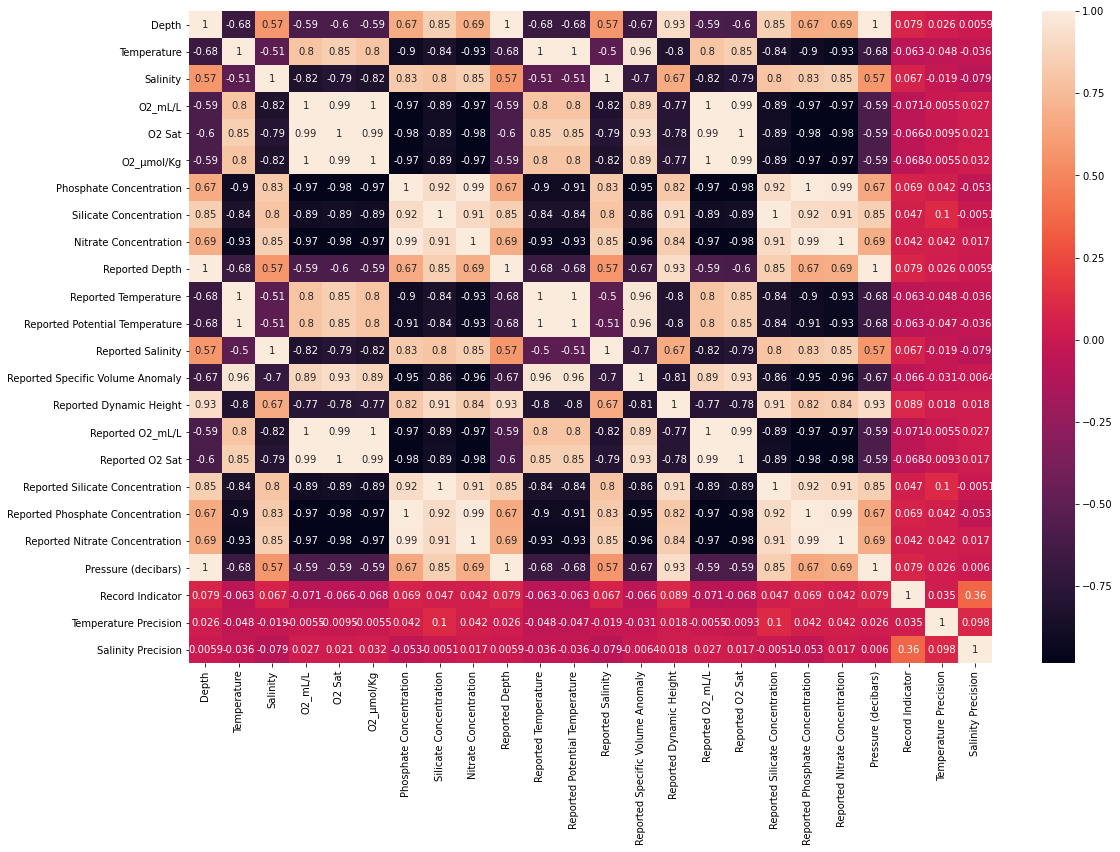

In [49]:
plt.figure(figsize=(18,12))
sns.heatmap(new_data1.corr(), annot=True)

Most of the reported data are highly correlated with the main data. so I suggest we drop all reported data


'O2_mL/L', 'O2 Sat', 'O2_µmol/Kg', are also highly correlated, 

In [50]:
new_data1.select_dtypes(exclude='object').columns

Index(['Depth', 'Temperature', 'Salinity', 'O2_mL/L', 'O2 Sat', 'O2_µmol/Kg',
       'Phosphate Concentration', 'Silicate Concentration',
       'Nitrate Concentration', 'Reported Depth', 'Reported Temperature',
       'Reported Potential Temperature', 'Reported Salinity',
       'Reported Specific Volume Anomaly', 'Reported Dynamic Height',
       'Reported O2_mL/L', 'Reported O2 Sat',
       'Reported Silicate Concentration', 'Reported Phosphate Concentration',
       'Reported Nitrate Concentration', 'Pressure (decibars)',
       'Record Indicator', 'Temperature Precision', 'Salinity Precision'],
      dtype='object')

In [51]:
drop_corr = ['Reported Depth', 'Reported Temperature',
       'Reported Potential Temperature', 'Reported Salinity',
       'Reported O2_mL/L', 'Reported O2 Sat',
       'Reported Silicate Concentration', 'Reported Phosphate Concentration',
       'Reported Nitrate Concentration', 'O2_mL/L',  'O2_µmol/Kg',]
new_data1.drop(columns = drop_corr, inplace=True)

In [52]:
new_data1.shape

(817509, 13)

In [53]:
new_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 817509 entries, 0 to 864862
Data columns (total 13 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Depth                             817509 non-null  int64  
 1   Temperature                       814247 non-null  float64
 2   Salinity                          817509 non-null  float64
 3   O2 Sat                            661274 non-null  float64
 4   Phosphate Concentration           393930 non-null  float64
 5   Silicate Concentration            348693 non-null  float64
 6   Nitrate Concentration             332233 non-null  float64
 7   Reported Specific Volume Anomaly  812092 non-null  float64
 8   Reported Dynamic Height           811598 non-null  float64
 9   Pressure (decibars)               817509 non-null  int64  
 10  Record Indicator                  817509 non-null  int64  
 11  Temperature Precision             814247 non-null  f

In [57]:
new_data1['Record Indicator'] = new_data1['Record Indicator'].replace({3:'Low', 4:'Medium', 5:'Medium', 6:'Medium', 7:'High'})

We may also used some more descriptive terms for the other categorical columns if need be

Further preprocessing can be done on this data such as imputing missing values, scaling or normalizing the data, perform transformation on highly skewed data(np.sqrt, np.lop1p)

In [ ]:
new_data1.to_csv('preprocessed_data.csv', index=False)